# Normaler Zeemann Effekt

In [1]:
import os
import numpy as np


## Kalibrationskurve
Fitte an die Messung des Magnetfeldes in Abhängigkeit des Spulenstroms eine Funktion, um aus den Ströme 
das Magnetfeld bestimmen zu können. Dies wird für die Magnetfeldmessung vor und nach dem Versuch durchgeführt. Ein Fit 
wird mit der Anpassung 
$$B(I) = \alpha + \frac{\beta}{(\gamma + e^{-\delta I})^{\epsilon}}$$
durchgeführt

<class 'function'>


/tmp/ipykernel_38039/2468508029.py:8: RuntimeWarning: overflow encountered in exp
  denom = (c + np.exp(-d*x))**(1/e)
/tmp/ipykernel_38039/2468508029.py:8: RuntimeWarning: invalid value encountered in power
  denom = (c + np.exp(-d*x))**(1/e)
/tmp/ipykernel_38039/2468508029.py:10: RuntimeWarning: divide by zero encountered in divide
  return a + b / denom


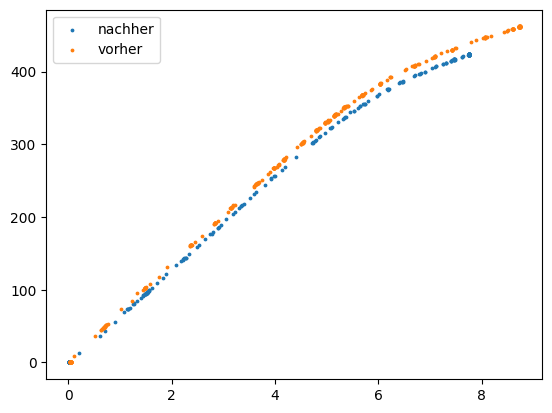

In [2]:
import matplotlib.pyplot as plt
from scipy import odr, optimize
from typing import Callable

func = Callable[[float], float]

def fit_function(x: float, a, b, c, d, e) -> float:
    """Fit Funktion für das Magnetfeld nach dem oben beschriebenen Schema"""
    
    denom = (c + np.exp(-d*x))**(1/e)
    
    return a + b / denom

def do_fit(data: np.ndarray) -> any:
    """führt für einen Datensatz einen fit durch"""
    assert(len(data) == 2)
    
    return optimize.curve_fit(fit_function, *data)
    
 
bfield_before: func | None = None
bfield_after: func | None = None
 
fig, ax = plt.subplots()
for i in [["ende", "nachher"], ["3", "vorher"]]:
    data = np.loadtxt(f"../Data/Zeeman/kalibrierung_{i[0]}.txt", skiprows=1).transpose().__abs__()
    ax.scatter(*data, s = 3, label=i[1])
    popt, pcov = do_fit(data)
    fit = lambda x: fit_function(x, *popt)
    
    if i[1] ==  "vorher":
        bfield_before = fit
    else:
        bfield_after = fit

print(type(bfield_before))
plt.legend()
plt.show()